# Iris - Unsupervised Machine Learning-GRIP

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [101]:
#Importing the iris dataset

from sklearn.datasets import load_iris

df = load_iris()

In [102]:
Iris_df =  pd.DataFrame(df.data,columns=df.feature_names)
Iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
#checking on the available lables 

df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [104]:
Iris_df['Target'] = df.target
Iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# EDA

In [105]:
Iris_df.shape

(150, 5)

In [106]:
#Renaming the column for better understanding

Iris_df.rename(columns={'sepal length (cm)': 'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width'},inplace=True)
Iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


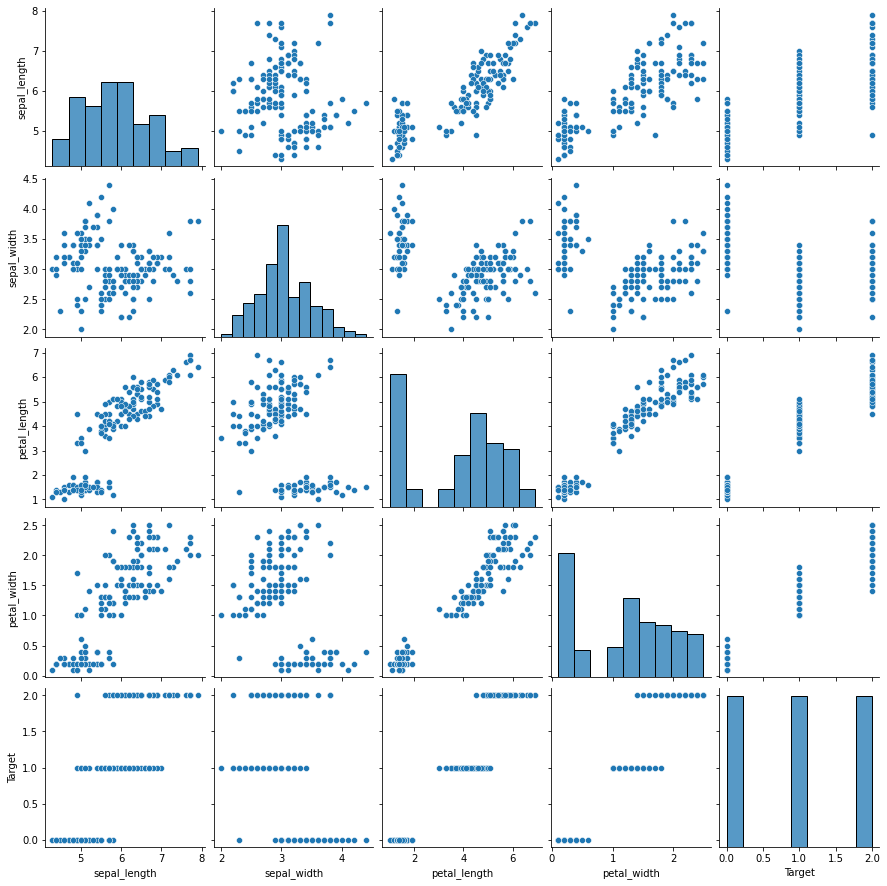

In [107]:
sns.pairplot(Iris_df)

<AxesSubplot:>

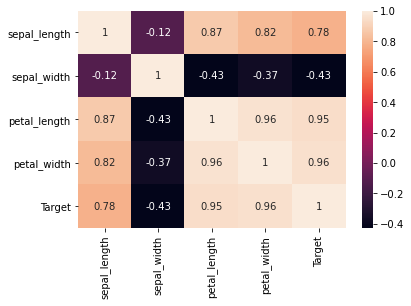

In [108]:
#check the correlation between each columns using a heat map 

sns.heatmap(Iris_df.corr(), annot = True )

In [109]:
sample_df = Iris_df[['sepal_length','sepal_width']]
sample_df

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [110]:
#prediction based on the target values that we got as cluster counts

km = KMeans(n_clusters=3)
m_km = km.fit_predict(Iris_df)
m_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

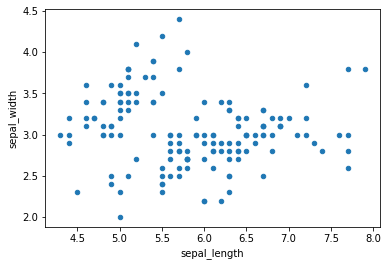

In [111]:
#plotting the sample data as a refernce for the final output

Iris_df.plot(kind='scatter', x='sepal_length', y='sepal_width');
plt.show()

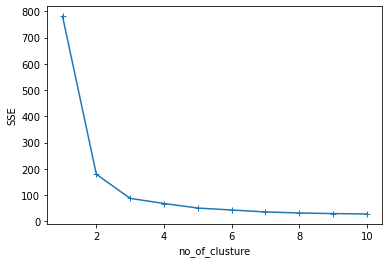

In [118]:
#Identifying the optimum cluster using Elbow Method

SSE = []
no_of_cluster = range(1,11)

for i in no_of_clustures :
    km = KMeans(n_clusters=i ,random_state = 0)
    km.fit(Iris_df.values)
    SSE.append(km.inertia_)
    
plt.plot(no_of_cluster,SSE,marker='+')  
plt.xlabel('no_of_clusture')
plt.ylabel('SSE')
plt.show()

We can see that the line starts to become linear from the elbow poin 3 , so we can take 3 as our clusture going further

In [113]:
New_df = pd.DataFrame({'Clustures': no_of_cluster , 'SSE':SSE})
New_df

,Clustures,SSE
0,1,781.370600
1,2,179.053583
2,3,87.220628
3,4,67.662919
4,5,50.357621
5,6,42.874793
6,7,35.502632
7,8,31.563856
8,9,29.235285
9,10,27.617062


In the above dataframe we can see that when the number clusture is less the SSE is high i.e huge number of data point around a centroid. As the number of centroids(clustures ) increases the data points are evenly distributed

# Training Data

In [114]:
#Providing the clustures to the model using kMean algorithm
km = KMeans(n_clusters=3,random_state=0)
centroids = km.fit_predict(Iris_df.values) #Training the model 

In [115]:
centroids #The o/p shows us the Labels available with the data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

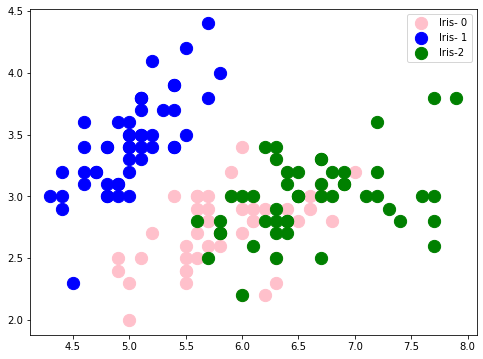

In [116]:
#Plotting the data to identify the clustures

plt.figure(figsize=(8,6))
plt.scatter( Iris_df.values[centroids == 0,0], Iris_df.values[centroids == 0,1],s=150, c='pink', label = 'Iris- 0')
plt.scatter( Iris_df.values[centroids == 1,0], Iris_df.values[centroids == 1,1],s=150, c='blue', label = 'Iris- 1')
plt.scatter( Iris_df.values[centroids == 2,0], Iris_df.values[centroids == 2,1],s=150, c='green', label = 'Iris-2')
plt.legend()

we can see 3 clusters in the plot